# Reward Optimizing Recommendation using Deep Learning and Fast Maximum Inner Product Search (MIPS)


## Getting Started

In [ ]:
!pip install gdown
!git clone https://github.com/otmhi/Reward-Optimizing-Reco.git
%cd Reward-Optimizing-Reco

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'Reward-Optimizing-Reco'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 148 (delta 23), reused 8 (delta 3), pack-reused 96
Receiving objects: 100% (148/148), 18.05 MiB | 14.28 MiB/s, done.
Resolving deltas: 100% (59/59), done.
/content/Reward-Optimizing-Reco


In [ ]:
!gdown https://drive.google.com/u/0/uc?id=112Y_ggpjpk8M5zN7uxOYbLhZAm26qQJL&export=download
!unzip saved_models_and_indexes

Downloading...
From: https://drive.google.com/u/0/uc?id=112Y_ggpjpk8M5zN7uxOYbLhZAm26qQJL
To: /content/Reward-Optimizing-Reco/saved_models_and_indexes.zip
100% 458M/458M [00:03<00:00, 125MB/s]
Archive:  saved_models_and_indexes.zip
   creating: saved_models/Oracle/assets/
   creating: saved_models/PRRModel/assets/
  inflating: saved_indexes/embedding_10000.npy  
   creating: saved_models/RewardModel/assets/
  inflating: saved_indexes/embedding_16900.npy  
  inflating: saved_models/PRRModel/saved_model.pb  
  inflating: saved_models/Oracle/saved_model.pb  
  inflating: saved_indexes/embedding_13000.npy  
  inflating: saved_indexes/embedding_62747.npy  
  inflating: saved_models/RewardModel/saved_model.pb  
  inflating: saved_indexes/embedding_28561.npy  
  inflating: saved_indexes/index_37129.index  
  inflating: saved_models/PRRModel/variables/variables.data-00000-of-00001  
  inflating: saved_models/PRRModel/variables/variables.index  
  inflating: saved_indexes/embedding_21970.npy  


In [ ]:
!apt install libomp-dev
!python -m pip install --upgrade faiss-cpu

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libomp5
Suggested packages:
  libomp-doc
The following NEW packages will be installed:
  libomp-dev libomp5
0 upgraded, 2 newly installed, 0 to remove and 32 not upgraded.
Need to get 239 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp5 amd64 5.0.1-1 [234 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp-dev amd64 5.0.1-1 [5,088 B]
Fetched 239 kB in 1s (259 kB/s)
Selecting previously unselected package libomp5:amd64.
(Reading database ... 155685 files and directories currently installed.)
Preparing to unpack .../libomp5_5.0.1-1_amd64.deb ...
Unpacking libomp5:amd64 (5.0.1-1) ...
Se

In [ ]:
%load_ext rpy2.ipython

In [ ]:
import tensorflow as tf
import numpy as np
import faiss
import time
import matplotlib.pyplot as plt
import random 
import pickle

from models import PRRModel, RewardModel, SlateIPS, IndependentIPS, RandomModel
from utils.logging_policy import LoggingPolicy
from utils.simulator import Simulator
from utils.simulated_ab_test import ABTest

import pandas as pd

SEED=42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

## Part1: Approximate vs. Exact Top-K Search

In slate recommendation, the decision rule often has the following form 
$$a_1,...,a_K = {\rm argsort}\left(f_\Xi(x)^\top \beta\right)_{[1:K]}\,,$$
where 
- $x$ is the context.
- $f_\Xi(x)$ is user embedding of dimension $d$, which depends on the context.
- $\beta$ is the matrix of item embeddings of dimension $d \times P$ where $P$ is the total number of items in the catalog.

The time complexity of sorting a list of $P$ items is $O(P \log(P))$, and that of selecting the top-$K$ items from a list of $P$ items is $O(P \log(K))$. Thus, the time complexity of the operation ${\rm argsort}\left(f_\Xi(x)^\top \beta\right)_{[1:K]}$ is $O(P \log(K))$, which is inefficient for low latency RecSys with very large catalogs (large values of $P$).

Now notice that the score of the decision rule has the form $f_\Xi(x)^\top \beta$, and thus approximate top-$K$ can be used to search for the top-$K$ items in $O(\log(P))$. Approximate top-$K$ search algorithms can be implemented using faiss. In this part of the tutorial, we show how we can use faiss to search for the top-$K$ items of a list and highlight its computational efficiency.

### Exercise 1: Computing the recommendation scores and performing search using numpy and faiss



1.   Create a function compute_reco_score that takes that takes input a query_user (user embedding of dimension $1 \times d$) and products_embeddings (a $P \times d$ matrix of $P$ products embeddings of dimension $1 \times d$), and returns a list (of size $P$) containing the recommendation score of each product.

2.   Create a function exact_search that takes as input a list of $P$ scores and an integer $K$, and returns the indices of the $K$ highest scores. 

3. Create a function approximate_search that takes as input a query_user, an faiss index of the products embeddings, and an integer $K$, and returns the indices of the $K$ highest scores. 





In [ ]:
def compute_reco_score(query_user, products_embeddings):
  reco_scores = None ##TODO
  return reco_scores

def exact_search(reco_scores, K):
  I = None ##TODO
  return I

def approximate_search(query_user, products_embeddings_index, K):
  _, I = None, None ##TODO - hint products_embeddings_index.search
  return I

### Solution 1: Computing the recommendation scores and performing search using numpy and faiss

In [ ]:
def compute_reco_score(query_user, products_embeddings):
  reco_scores = products_embeddings @ query_user.T
  return reco_scores

In [ ]:
def exact_search(reco_scores, K):
  I = np.argsort(-reco_scores, axis=0)[:K]
  return I

In [ ]:
def approximate_search(query_user, products_embeddings_index, K):
  _, I = products_embeddings_index.search(query_user, K)
  return I

In [ ]:
d = 100 # embedding dimension
K = 4 # slate size
query_user = np.random.rand(1, d).astype('float32') # user embedding (query)

catalog_sizes = [10000]
for i in range(1, 11):
    catalog_sizes.append(int(catalog_sizes[i-1]*1.3))
nbr_runs = 1000

mips_times = []
argsort_times = []

for nbr_products in catalog_sizes:
  print('Performing search on a catalog of {} products'.format(nbr_products))
  products_embeddings = np.load('saved_indexes/embedding_{}.npy'.format(nbr_products))

  # exact search using argosrt: O(PlogP), where P is the number of products
  start = time.time()
  for i in range(nbr_runs):
    reco_scores = compute_reco_score(query_user, products_embeddings)
    I = exact_search(reco_scores, K) #exact search
  end = time.time()
  argsort_times.append((end-start)/nbr_runs)

  products_embeddings_index = faiss.read_index('saved_indexes/index_{}.index'.format(nbr_products))
  # fais O(logP), where P is the number of products
  start = time.time()
  for i in range(nbr_runs):
    I = approximate_search(query_user, products_embeddings_index, K)  # approximate search
  end = time.time()
  mips_times.append((end-start)/nbr_runs)

Performing search on a catalog of 10000 products
Performing search on a catalog of 13000 products
Performing search on a catalog of 16900 products
Performing search on a catalog of 21970 products
Performing search on a catalog of 28561 products
Performing search on a catalog of 37129 products
Performing search on a catalog of 48267 products
Performing search on a catalog of 62747 products
Performing search on a catalog of 81571 products
Performing search on a catalog of 106042 products
Performing search on a catalog of 137854 products


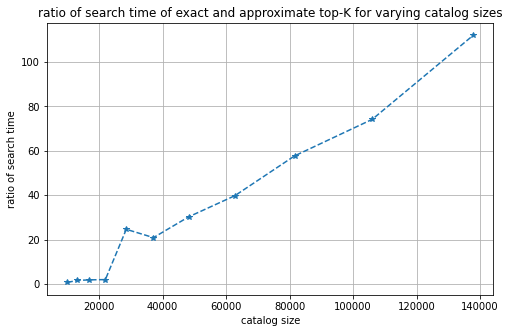

In [ ]:
search_times_ratios = np.array(argsort_times)/np.array(mips_times)
plt.figure(figsize=(8, 5))
plt.plot(catalog_sizes, search_times_ratios, '*--')
plt.xlabel('catalog size')
plt.ylabel('ratio of search time')
plt.title('ratio of search time of exact and approximate top-K for varying catalog sizes')
plt.grid()

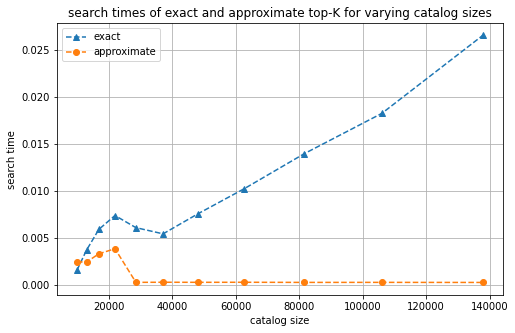

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(catalog_sizes, argsort_times, '^--', label='exact')
plt.plot(catalog_sizes, mips_times, 'o--', label='approximate')
plt.xlabel('catalog size')
plt.ylabel('search time')
plt.title('search times of exact and approximate top-K for varying catalog sizes')
plt.grid()
plt.legend()

In [ ]:
nbr_products = 10000
print('Performing search on a catalog of {} products'.format(nbr_products))
products_embeddings = np.load('saved_indexes/embedding_{}.npy'.format(nbr_products))
products_embeddings_index = faiss.read_index('saved_indexes/index_{}.index'.format(nbr_products))

# approximate argosrt: fais O(logP), where P is the number of products
I_approximate = approximate_search(query_user, products_embeddings_index, K)  # approximate search

# exact argosrt: O(PlogP), where P is the number of products
reco_scores = compute_reco_score(query_user, products_embeddings)
I_exact = exact_search(reco_scores, K) #exact search


print('The search result using exact top-K', I_exact[:, 0])
print('The search result using approximate top-K', I_approximate)

Performing search on a catalog of 10000 products
The search result using exact top-K [9172 8898 6804 4200]
The search result using approximate top-K [[9172 8898 6804 4200]]


Text(0.5, 0, 'recall@4')

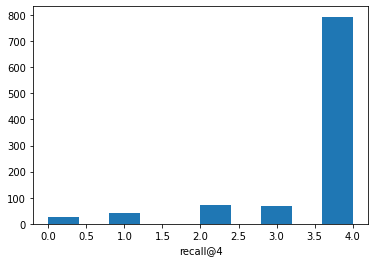

In [ ]:
h = []

for _ in range(1000):

  query_user = np.random.rand(1, d).astype('float32')

  I_approximate = approximate_search(query_user, products_embeddings_index, K)  # approximate search

  reco_scores = compute_reco_score(query_user, products_embeddings)
  I_exact = exact_search(reco_scores, K) #exact search

  h.append(sum((I_exact[:, 0] == I_approximate)[0]))

plt.hist(h)
plt.xlabel('recall@4')